In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('worldometer_snapshots_April18_to_May18.csv', parse_dates=['Date'])
age_df = pd.read_csv('population_structure_by_age_per_contry.csv')
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


### We are going to estimate the true death rate of each country based on the age relationship dataset 'age_df'

1. Firstly, let us clean the existing data and make it ready to be merged with the new dataset.
2. We have 6603 rows and 9 columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
Date                   6603 non-null datetime64[ns]
Country                6603 non-null object
Population             6603 non-null int64
Total Tests            5505 non-null float64
Total Cases            6554 non-null float64
Total Deaths           5367 non-null float64
Total Recovered        6318 non-null float64
Serious or Critical    4117 non-null float64
Active Cases           6544 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 464.4+ KB


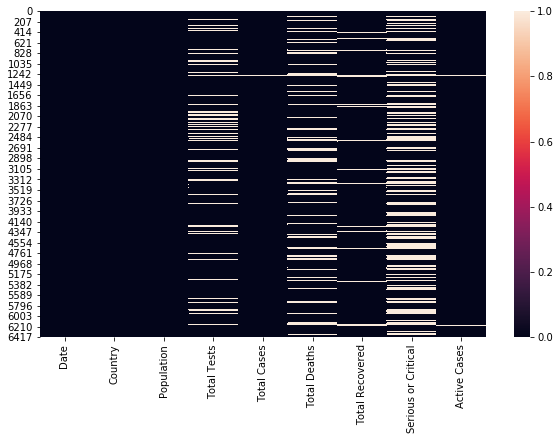

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna())

In [5]:
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


1. Values are way-outside the boundries and has lot of outliers. We won't remove them as they are actual values.
2. We see a lot of null values. Since, our data can't function without actual values, we will remove all null rows.

In [6]:
print('Initial Shape ::', df.shape)
df.dropna(axis=0, inplace=True)
print('Final Shape ::', df.shape)

Initial Shape :: (6603, 9)
Final Shape :: (3514, 9)


In [7]:
df.index = range(0, 3514)

In [8]:
df.sort_values(by='Total Deaths', ascending=False)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
3400,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
3287,2020-05-17,USA,330774664,11875580.0,1527664.0,90978.0,346389.0,16355.0,1090297.0
3175,2020-05-16,USA,330774664,11949625.0,1507773.0,90113.0,339232.0,16248.0,1078428.0
3060,2020-05-15,USA,330774664,11090900.0,1484285.0,88507.0,327751.0,16139.0,1068027.0
2946,2020-05-14,USA,330774664,10638893.0,1457593.0,86912.0,318027.0,16240.0,1052654.0
...,...,...,...,...,...,...,...,...,...
1678,2020-05-02,Cambodia,16690788,12304.0,122.0,0.0,120.0,1.0,2.0
1685,2020-05-02,French Polynesia,280717,2634.0,58.0,0.0,51.0,1.0,7.0
1674,2020-05-02,Madagascar,27599599,3611.0,135.0,0.0,98.0,1.0,51.0
1673,2020-05-02,Vietnam,97234232,261004.0,270.0,0.0,219.0,8.0,52.0


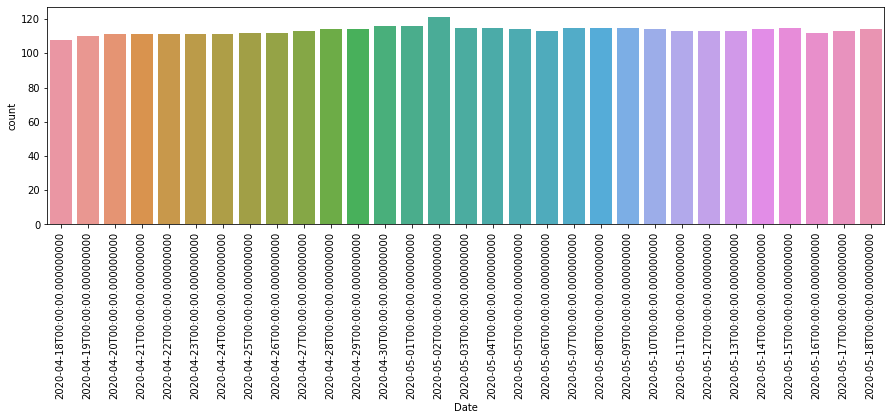

In [9]:
plt.figure(figsize=(15,4))
plt.xticks(rotation='vertical')
sns.countplot(x='Date', data=df)

1. We have maximum data on '2020-05-02'
2. We will take the latest data and find the relation with age in the country.

In [10]:
df['Date'].max()

Timestamp('2020-05-18 00:00:00')

In [11]:
last_df = df[df['Date']=='2020-05-18']
last_df.head(5).append(last_df.tail(5))

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
3400,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
3401,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
3402,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
3403,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
3404,2020-05-18,Italy,60471924,3041366.0,225886.0,32007.0,127326.0,749.0,66553.0
3509,2020-05-18,Bahamas,392795,1826.0,96.0,11.0,43.0,1.0,42.0
3510,2020-05-18,Barbados,287335,4004.0,88.0,7.0,68.0,4.0,13.0
3511,2020-05-18,Sint Maarten,42817,414.0,77.0,15.0,54.0,7.0,8.0
3512,2020-05-18,Malawi,19066433,1803.0,70.0,3.0,27.0,1.0,40.0
3513,2020-05-18,Antigua and Barbuda,97833,183.0,25.0,3.0,19.0,1.0,3.0


In [12]:
cat_df, num_df = [], []
for i in last_df:
    if last_df[i].dtype=='O':
        cat_df.append(i)
    elif (last_df[i].dtypes=='int64') | (last_df[i].dtypes=='float64') | (last_df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
print('>>> Total Number of Features ::', last_df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 9
>>> Number of Categorical Features :: 1
>>> Number of Numerical Features :: 7


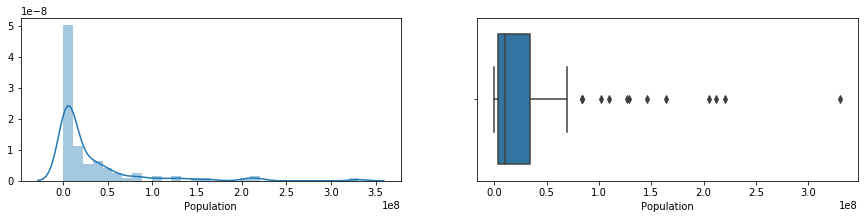

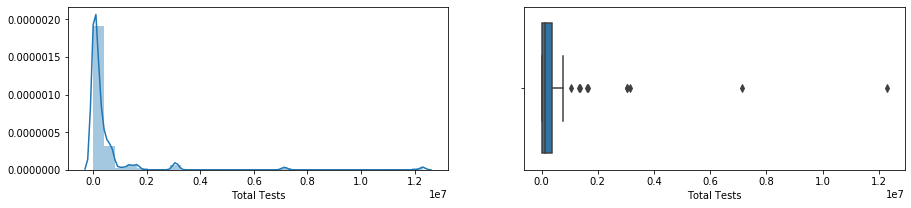

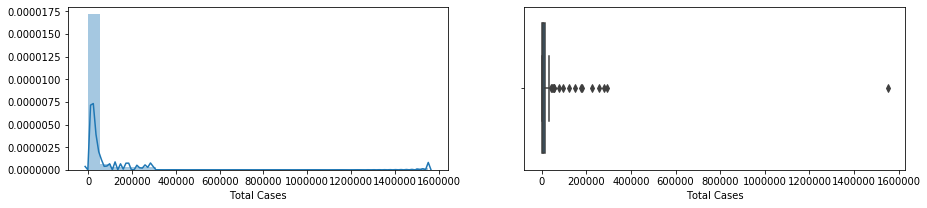

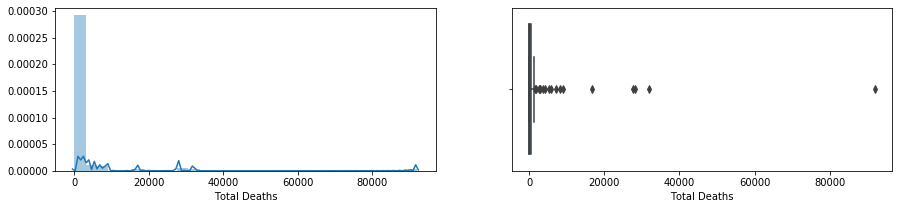

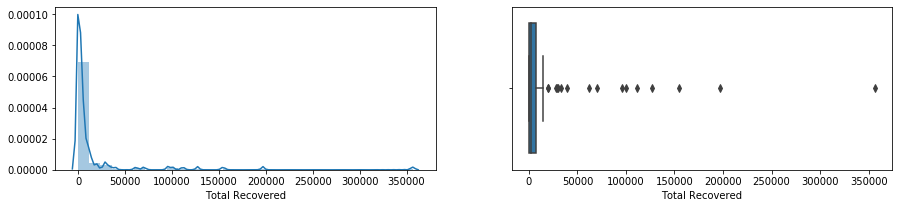

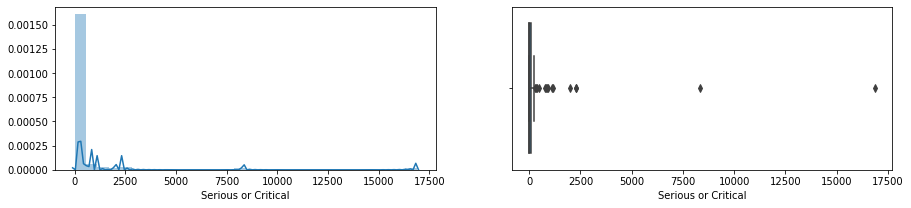

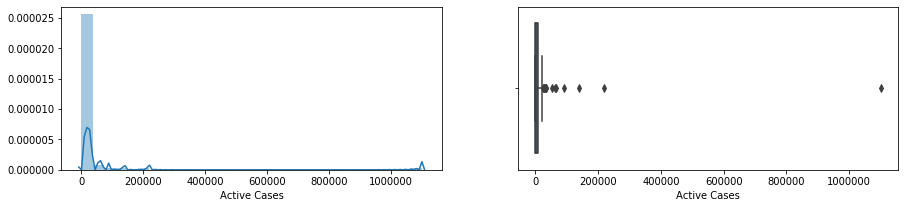

In [13]:
#Univariate analysis for num_df
skewness, skew_name = [], []
for i in num_df:
    f=plt.figure(figsize=(15,3))
    f.add_subplot(1,2,1)
    sns.distplot(last_df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(last_df[i])
    skewness.append(round(last_df[i].skew(),2))
    skew_name.append(i)

In [14]:
skew_df = pd.DataFrame(skewness, index=[skew_name], columns=['Skewness']).sort_values(by='Skewness', ascending=False)
skew_df[skew_df['Skewness'] > 0.55].T

,Active Cases,Total Cases,Serious or Critical,Total Deaths,Total Tests,Total Recovered,Population
Skewness,9.7,8.76,7.97,7.31,6.52,5.17,3.14


1. Most data is cocentrated around 0.
2. We will take the max values and ignore countries having less number of cases.

#### True Death Rate (TDR) is calculated by dividing Total Deaths and Active Cases.

In [15]:
last_df['TDR'] = last_df['Total Deaths']/last_df['Active Cases']
last_df.shape

(114, 10)

In [16]:
last_df = last_df.reset_index(drop=True)
last_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,TDR
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.083473
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.012501
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.517722
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.122074
4,2020-05-18,Italy,60471924,3041366.0,225886.0,32007.0,127326.0,749.0,66553.0,0.480925
...,...,...,...,...,...,...,...,...,...,...
109,2020-05-18,Bahamas,392795,1826.0,96.0,11.0,43.0,1.0,42.0,0.261905
110,2020-05-18,Barbados,287335,4004.0,88.0,7.0,68.0,4.0,13.0,0.538462
111,2020-05-18,Sint Maarten,42817,414.0,77.0,15.0,54.0,7.0,8.0,1.875000
112,2020-05-18,Malawi,19066433,1803.0,70.0,3.0,27.0,1.0,40.0,0.075000


### Let us process age_df now.

In [17]:
age_df

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [18]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
Country                     213 non-null object
Fraction age 0-14 years     176 non-null float64
Fraction age 15-64 years    176 non-null float64
Fraction age 65+ years      176 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [19]:
age_df.describe()

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,176.000000,176.000000,176.000000
mean,0.276098,0.636109,0.087731
std,0.106748,0.066543,0.062522
min,0.115000,0.472000,0.011000
25%,0.177000,0.596750,0.034000
50%,0.266500,0.649000,0.063500
75%,0.368250,0.675250,0.143250
max,0.502000,0.850000,0.270000


1. Age structure values must be converted to percent by multiplying with 100.
2. Only 176 values present in the data without null values.

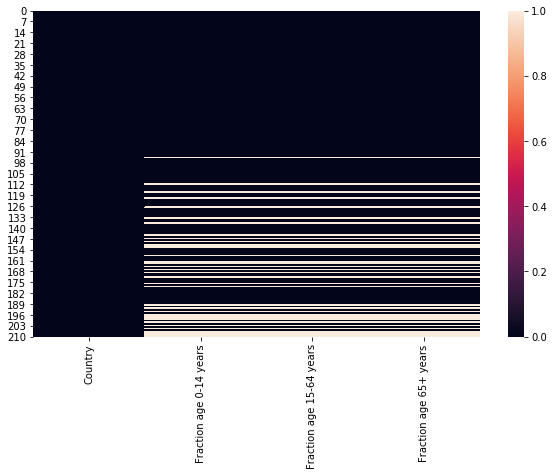

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(age_df.isna())

In [21]:
print('Initial Shape ::', age_df.shape)
age_df.dropna(axis=0, inplace=True)
print('Final Shape ::', age_df.shape)

Initial Shape :: (213, 4)
Final Shape :: (176, 4)


In [22]:
age_df = age_df.reset_index(drop=True)
age_df.columns = ['Country', '0_14_years', '15_65_years', '65_plus_years']
age_df

,Country,0_14_years,15_65_years,65_plus_years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
171,Comoros,0.398,0.573,0.030
172,Suriname,0.264,0.666,0.069
173,Seychelles,0.222,0.692,0.086
174,Papua New Guinea,0.359,0.603,0.038


In [23]:
age_df

,Country,0_14_years,15_65_years,65_plus_years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
171,Comoros,0.398,0.573,0.030
172,Suriname,0.264,0.666,0.069
173,Seychelles,0.222,0.692,0.086
174,Papua New Guinea,0.359,0.603,0.038


In [24]:
df = last_df.merge(age_df, on='Country')
df.head(5)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,TDR,0_14_years,15_65_years,65_plus_years
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.083473,0.189,0.657,0.154
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.012501,0.176,0.682,0.142
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.517722,0.147,0.659,0.194
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.122074,0.217,0.697,0.086
4,2020-05-18,Italy,60471924,3041366.0,225886.0,32007.0,127326.0,749.0,66553.0,0.480925,0.135,0.635,0.230


In [25]:
df['TDR_Percent'] = df['TDR']*100
df['0_14_years_Percent'] = df['0_14_years']*100
df['15_65_years_Percent'] = df['15_65_years']*100
df['65_plus_years_Percent'] = df['65_plus_years']*100
df.drop(columns=['Date'], axis=1, inplace=True)
df.head(5)

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,TDR,0_14_years,15_65_years,65_plus_years,TDR_Percent,0_14_years_Percent,15_65_years_Percent,65_plus_years_Percent
0,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.083473,0.189,0.657,0.154,8.347263,18.9,65.7,15.4
1,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.012501,0.176,0.682,0.142,1.250075,17.6,68.2,14.2
2,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.517722,0.147,0.659,0.194,51.772202,14.7,65.9,19.4
3,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.122074,0.217,0.697,0.086,12.207365,21.7,69.7,8.6
4,Italy,60471924,3041366.0,225886.0,32007.0,127326.0,749.0,66553.0,0.480925,0.135,0.635,0.230,48.092498,13.5,63.5,23.0


In [26]:
df1 = df[(df['Total Deaths']>1000) & (df['Country']!='Switzerland')].sort_values(by='TDR', ascending=False)
df1.head(5)

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,TDR,0_14_years,15_65_years,65_plus_years,TDR_Percent,0_14_years_Percent,15_65_years_Percent,65_plus_years_Percent
6,Germany,83752855,3147771.0,177289.0,8123.0,154600.0,1133.0,14566.0,0.557669,0.131,0.655,0.215,55.766854,13.1,65.5,21.5
2,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.517722,0.147,0.659,0.194,51.772202,14.7,65.9,19.4
23,Ireland,4931150,258808.0,24200.0,1547.0,19470.0,54.0,3183.0,0.486019,0.216,0.644,0.139,48.601948,21.6,64.4,13.9
13,Mexico,128770253,172294.0,49219.0,5177.0,33329.0,378.0,10713.0,0.483245,0.267,0.665,0.069,48.324466,26.7,66.5,6.9
4,Italy,60471924,3041366.0,225886.0,32007.0,127326.0,749.0,66553.0,0.480925,0.135,0.635,0.230,48.092498,13.5,63.5,23.0


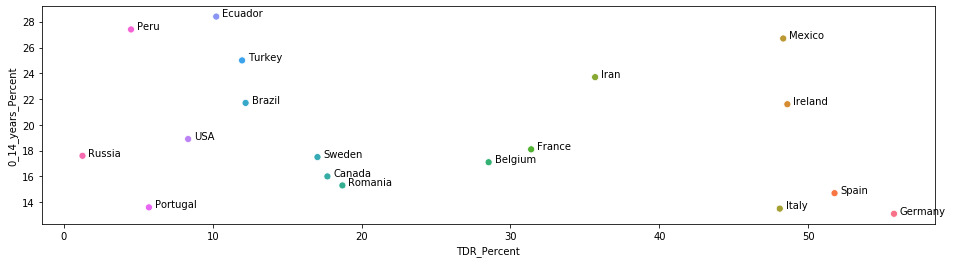

In [27]:
fig, ax = plt.subplots(figsize=(16,4))
x = list(df1['TDR_Percent'].values)
y = list(df1['0_14_years_Percent'].values)

sns.scatterplot(x='TDR_Percent', y='0_14_years_Percent', data=df1, hue='Country', legend=False, s=50)

for i, txt in enumerate(df1['Country']):
    ax.annotate(txt, (x[i]+0.4, y[i]))

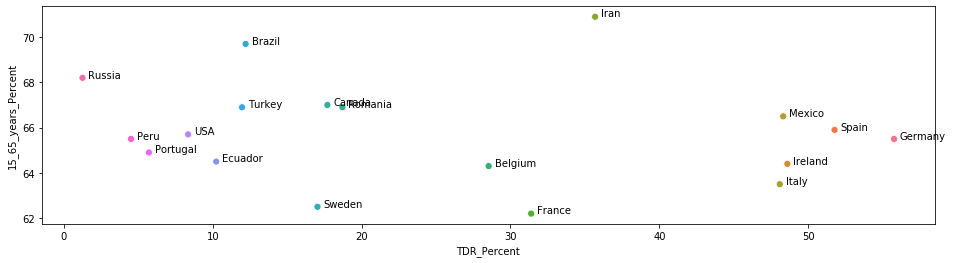

In [28]:
fig, ax = plt.subplots(figsize=(16,4))
x = list(df1['TDR_Percent'].values)
y = list(df1['15_65_years_Percent'].values)

sns.scatterplot(x='TDR_Percent', y='15_65_years_Percent', data=df1, hue='Country', legend=False, s=50)

for i, txt in enumerate(df1['Country']):
    ax.annotate(txt, (x[i]+0.4, y[i]))

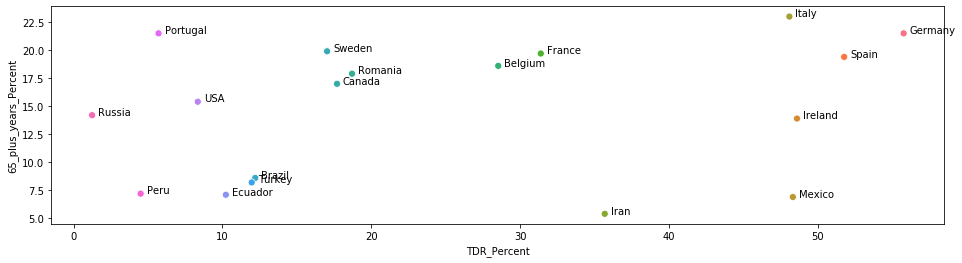

In [29]:
fig, ax = plt.subplots(figsize=(16,4))
x = list(df1['TDR_Percent'].values)
y = list(df1['65_plus_years_Percent'].values)

sns.scatterplot(x='TDR_Percent', y='65_plus_years_Percent', data=df1, hue='Country', legend=False, s=50)

for i, txt in enumerate(df1['Country']):
    ax.annotate(txt, (x[i]+0.4, y[i]))

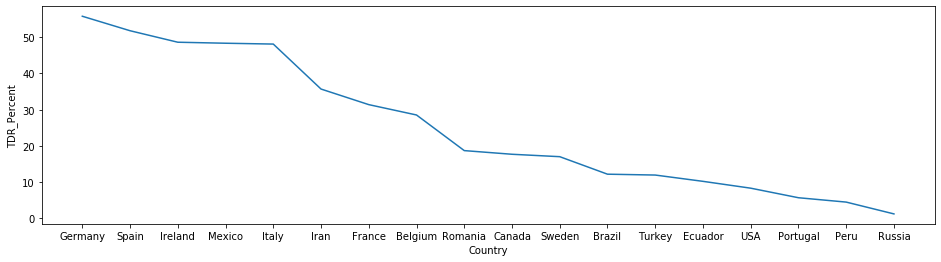

In [30]:
plt.figure(figsize=(16,4))
sns.lineplot(x='Country', y='TDR_Percent', data=df1, sort=False, ci=None)

Text(0, 0.5, 'Age Fraction by Population')

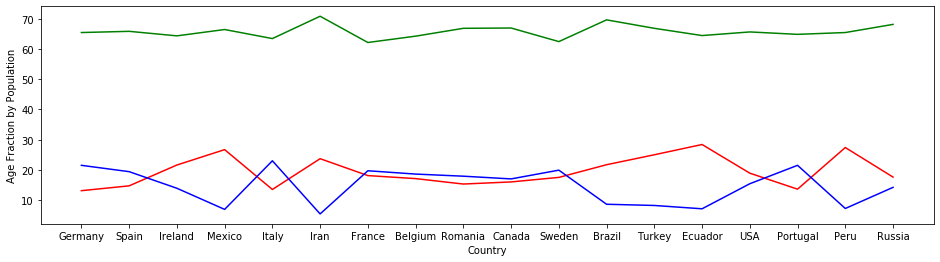

In [31]:
plt.figure(figsize=(16,4))
sns.lineplot(x='Country', y='0_14_years_Percent', data=df1, sort=False, ci=None, color='red')
sns.lineplot(x='Country', y='15_65_years_Percent', data=df1, sort=False, ci=None, color='green')
sns.lineplot(x='Country', y='65_plus_years_Percent', data=df1, sort=False, ci=None, color='blue')
plt.ylabel('Age Fraction by Population')